### Supervised Learning Analysis: test vs train accuracy


#### test vs train accuracy 
* After 30 rounds of supervised training using 500 reads of native yeast rRNA (NOP58_GAL). This notebook compares test vs train accuracy across the 30 rounds of training. Testing is a separate sample of native yeast rRNA sequenced on a different day on a different flowcell (CBF5_GAL)
* Note: Because the training was performed on native yeast rRNA and calls are only attempted on modified locations, the recall or true positive rate is going to be our metric for this analysis. 


In [1]:
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 



mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
from py3helpers.utils import list_dir
training_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_accuracy_csvs"
testing_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
training_csvs = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in list_dir(training_path, "csv")]
testing_csvs = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in list_dir(testing_path, "csv")]

training_csvs[0]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent
0,RDN18-1,27,+,Aa,0.9080,1.0,0.0,0.9080,NaN,NaN,NaN,NaN,0.9518,1.0,NaN,1.0,0.8803,72.0,NaN,72.0,False,False,False,95
1,RDN18-1,99,+,Aa,0.8119,1.0,0.0,0.8119,NaN,NaN,NaN,NaN,0.8962,1.0,NaN,1.0,0.7732,6.0,72.0,6.0,False,False,False,80
2,RDN18-1,105,+,Tl,0.9018,1.0,0.0,0.9018,NaN,NaN,NaN,NaN,0.9484,1.0,NaN,1.0,0.8633,14.0,6.0,6.0,False,False,False,95
3,RDN18-1,119,+,Tl,0.8507,1.0,0.0,0.8507,NaN,NaN,NaN,NaN,0.9193,1.0,NaN,1.0,0.7872,91.0,14.0,14.0,False,False,False,95
4,RDN18-1,210,+,Tl,0.8384,1.0,0.0,0.8384,NaN,NaN,NaN,NaN,0.9121,1.0,NaN,1.0,0.7963,91.0,91.0,91.0,False,False,False,83
5,RDN18-1,301,+,Tl,0.7689,1.0,0.0,0.7689,NaN,NaN,NaN,NaN,0.8694,1.0,NaN,1.0,0.7042,112.0,91.0,91.0,False,False,False,86
6,RDN18-1,413,+,Cb,0.8484,1.0,0.0,0.8484,NaN,NaN,NaN,NaN,0.9180,1.0,NaN,1.0,0.8070,6.0,112.0,6.0,False,False,False,95
7,RDN18-1,419,+,Aa,0.6086,1.0,0.0,0.6086,NaN,NaN,NaN,NaN,0.7567,1.0,NaN,1.0,0.5008,16.0,6.0,6.0,False,False,False,95
8,RDN18-1,435,+,Aa,0.8460,1.0,0.0,0.8460,NaN,NaN,NaN,NaN,0.9166,1.0,NaN,1.0,0.8063,30.0,16.0,16.0,False,False,False,73
9,RDN18-1,465,+,Tl,0.7864,1.0,0.0,0.7864,NaN,NaN,NaN,NaN,0.8805,1.0,NaN,1.0,0.7071,75.0,30.0,30.0,False,False,False,60


<IPython.core.display.Javascript object>


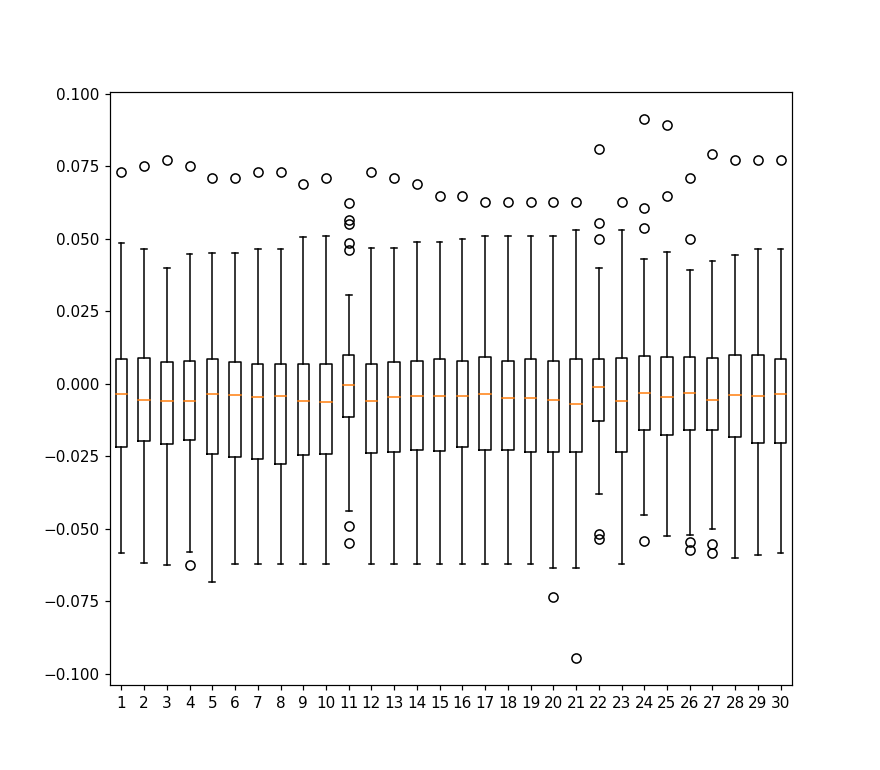

In [12]:
%matplotlib notebook
deltas = [testing_csvs[i].recall - training_csvs[i].recall  for i in range(len(training_csvs))]
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(deltas) 
  
# show plot 
plt.show() 


In [4]:
i = 0
testing_diff = 0.05
testing_csvs[i]["training_diff"] =  testing_csvs[i].recall - training_csvs[i].recall 
testing_csvs[i][np.abs(testing_csvs[i]["training_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "training_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,training_diff
3,RDN18-1,119,0.8328,0.7988,14.0,95,-0.0519
4,RDN18-1,210,0.8379,0.7805,91.0,83,-0.0579
7,RDN18-1,419,0.8014,0.6878,6.0,95,0.0792
22,RDN18-1,1180,0.8561,0.7310,6.0,95,-0.0561
24,RDN18-1,1190,0.7743,0.7002,4.0,100,-0.0780
33,RDN18-1,1638,0.8161,0.7376,64.0,79,-0.0511
50,RDN25-1,965,0.5363,0.6008,6.0,91,-0.0582
92,RDN25-1,2728,0.8231,0.6589,5.0,75,-0.0911


In [5]:
testing_csvs[i][["training_diff"]]  .describe()

,training_diff
count,110.000000
mean,-0.007897
std,0.026651
min,-0.091100
25%,-0.023050
50%,-0.009200
75%,0.009225
max,0.079200


In [6]:
i = 29
testing_diff = 0.05
testing_csvs[i]["training_diff"] =  testing_csvs[i].recall - training_csvs[i].recall 
testing_csvs[i][np.abs(testing_csvs[i]["training_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "training_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,training_diff
3,RDN18-1,119,0.8328,0.7988,14.0,95,-0.0519
4,RDN18-1,210,0.8379,0.7805,91.0,83,-0.0579
7,RDN18-1,419,0.8004,0.6878,6.0,95,0.0833
10,RDN18-1,540,0.9559,0.9182,21.0,95,0.0519
16,RDN18-1,765,0.8443,0.8156,7.0,95,-0.0519
24,RDN18-1,1190,0.7733,0.6982,4.0,100,-0.0800
33,RDN18-1,1638,0.8161,0.7376,64.0,79,-0.0511
50,RDN25-1,965,0.5373,0.6008,6.0,91,-0.0520
92,RDN25-1,2728,0.8123,0.6379,5.0,75,-0.0798
95,RDN25-1,2792,0.7397,0.7996,2.0,95,-0.0517


In [7]:
testing_csvs[i][["training_diff"]]  .describe()

,training_diff
count,110.000000
mean,-0.007676
std,0.026439
min,-0.080000
25%,-0.023225
50%,-0.008500
75%,0.008425
max,0.083300


## 0.1

In [8]:
from py3helpers.utils import list_dir
training_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.1_em_iterations_30/training_accuracy_csvs"
testing_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.1_em_iterations_30/testing_accuracy_csvs"
training_csvs = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in list_dir(training_path, "csv")]
testing_csvs = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in list_dir(testing_path, "csv")]

training_csvs[0]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent
0,RDN18-1,27,+,Aa,0.9100,1.0,0.0,0.9100,NaN,NaN,NaN,NaN,0.9529,1.0,NaN,1.0,0.8824,72.0,NaN,72.0,False,False,False,95
1,RDN18-1,99,+,Aa,0.8446,1.0,0.0,0.8446,NaN,NaN,NaN,NaN,0.9157,1.0,NaN,1.0,0.8207,6.0,72.0,6.0,False,False,False,80
2,RDN18-1,105,+,Tl,0.9080,1.0,0.0,0.9080,NaN,NaN,NaN,NaN,0.9518,1.0,NaN,1.0,0.8723,14.0,6.0,6.0,False,False,False,95
3,RDN18-1,119,+,Tl,0.9509,1.0,0.0,0.9509,NaN,NaN,NaN,NaN,0.9748,1.0,NaN,1.0,0.8403,91.0,14.0,14.0,False,False,False,95
4,RDN18-1,210,+,Tl,0.8896,1.0,0.0,0.8896,NaN,NaN,NaN,NaN,0.9416,1.0,NaN,1.0,0.8410,91.0,91.0,91.0,False,False,False,83
5,RDN18-1,301,+,Tl,0.8282,1.0,0.0,0.8282,NaN,NaN,NaN,NaN,0.9060,1.0,NaN,1.0,0.7558,112.0,91.0,91.0,False,False,False,86
6,RDN18-1,413,+,Cb,0.8668,1.0,0.0,0.8668,NaN,NaN,NaN,NaN,0.9286,1.0,NaN,1.0,0.8011,6.0,112.0,6.0,False,False,False,95
7,RDN18-1,419,+,Aa,0.6475,1.0,0.0,0.6475,NaN,NaN,NaN,NaN,0.7861,1.0,NaN,1.0,0.4738,16.0,6.0,6.0,False,False,False,95
8,RDN18-1,435,+,Aa,0.8789,1.0,0.0,0.8789,NaN,NaN,NaN,NaN,0.9355,1.0,NaN,1.0,0.8455,30.0,16.0,16.0,False,False,False,73
9,RDN18-1,465,+,Tl,0.9097,1.0,0.0,0.9097,NaN,NaN,NaN,NaN,0.9527,1.0,NaN,1.0,0.7765,75.0,30.0,30.0,False,False,False,60


<IPython.core.display.Javascript object>


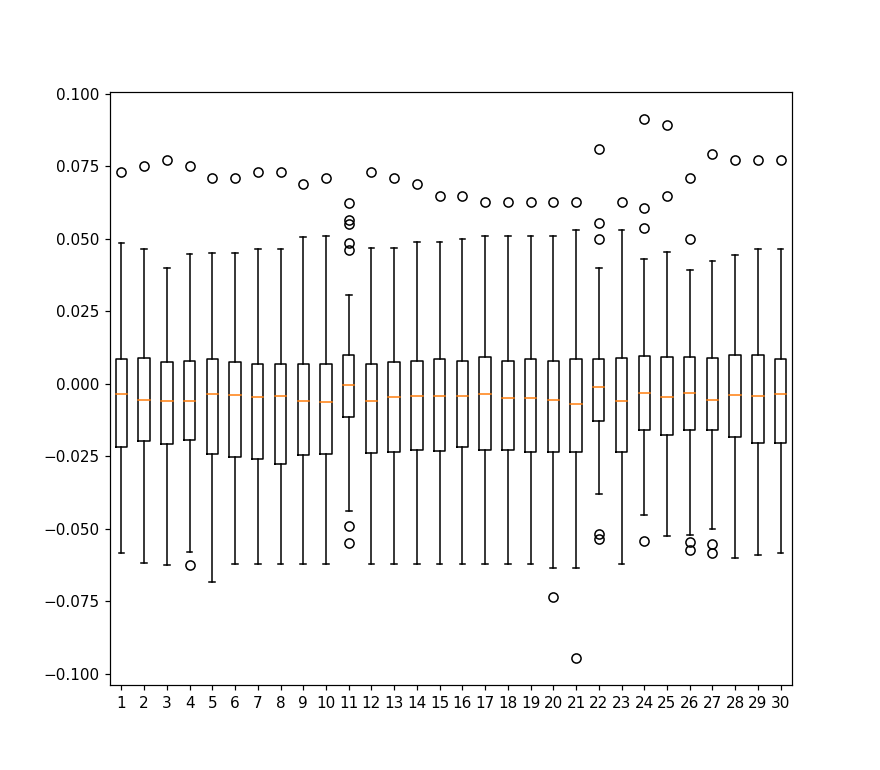

In [9]:
%matplotlib notebook
deltas = [testing_csvs[i].recall - training_csvs[i].recall  for i in range(len(training_csvs))]
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(deltas) 
  
# show plot 
plt.show() 


In [10]:
i = 0
testing_diff = 0.05
testing_csvs[i]["testing_diff"] =  testing_csvs[i].recall - training_csvs[i].recall 
testing_csvs[i][np.abs(testing_csvs[i]["testing_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "testing_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,testing_diff
4,RDN18-1,210,0.7635,0.8313,91.0,83,-0.0583
7,RDN18-1,419,0.7984,0.7204,6.0,95,0.0729
33,RDN18-1,1638,0.8213,0.7479,64.0,79,-0.0534
82,RDN25-1,2346,0.8679,0.8151,2.0,77,-0.0540


In [11]:
i = 29
testing_diff = 0.05
testing_csvs[i]["testing_diff"] =  testing_csvs[i].recall - training_csvs[i].recall 
testing_csvs[i][np.abs(testing_csvs[i]["testing_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "testing_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,testing_diff
4,RDN18-1,210,0.7472,0.8333,91.0,83,-0.0583
7,RDN18-1,419,0.7973,0.7204,6.0,95,0.0770
33,RDN18-1,1638,0.8213,0.7479,64.0,79,-0.0534
82,RDN25-1,2346,0.8722,0.8193,2.0,77,-0.0519
